## **Section 5:** Calculate Stats

In [1]:
# Import a few packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os
pd.options.display.max_rows = 300

In [2]:
print(os.getcwd())
os.chdir('G:/My Drive/Clark')
print(os.getcwd())

G:\My Drive\Clark\GIS Tutorials\Geog-312\Geog-312\1.Geopandas
G:\My Drive\Clark


### Read in countries gdf from parquet file

In [3]:
# Load the Parquet file
countries_gdf = gpd.read_parquet("GIS Tutorials/Geog-312/geopandas_Files/checkpoint4/countries.parquet")
countries_gdf.head()

,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314...",POINT (65.98786 33.75477),0.0,Kabul,4011770.0,POINT (69.1725 34.5289)
1,Akrotiri and Dhekelia,None,United Kingdom,18195,None,"MULTIPOLYGON (((33.90121 35.09612, 33.90185 35...",POINT (33.36206 34.83019),1.0,Episkopi Cantonment,1500.0,POINT (32.6242 34.6769)
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((20.0789 42.5558, 20.07939 42.5...",POINT (20.06737 41.12698),0.0,Tirana,475577.0,POINT (19.8189 41.3275)
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((8.64188 36.94206, 8.64196 36.9...",POINT (2.68012 27.89881),0.0,Algiers,2693542.0,POINT (3.042 36.7525)
4,American Samoa,AS,United States,49710,None,"MULTIPOLYGON (((-168.17253 -14.55294, -168.173...",POINT (-170.3959 -14.21789),1.0,Pago Pago,48526.0,POINT (-170.7025 -14.2781)


In [4]:
# Map with capitals sized by capPop
import folium
from folium import Popup, CircleMarker
from folium import Circle
from shapely.geometry import Point

# Center of the map (choose appropriate coordinates for your map)
map_center = [20, 0]  # Adjust as needed
m = folium.Map(location=map_center, zoom_start=2)

# Loop through each row in the DataFrame to add markers
for idx, row in countries_gdf.iterrows():
    if isinstance(row['capLoc'], Point):  # Ensure geometry is a Point
        # Extract latitude and longitude from the geometry column
        lat, lon = row['capLoc'].y, row['capLoc'].x
        
        # Set marker size by population with a minimum size threshold
        population = row['capPop']
        radius = max(4, min(population / 100000, 30))  # Adjust scaling as needed
        
        # Create the popup text
        tooltip_text = f"""
            <b>Country:</b> {row['COUNTRY']}<br>
            <b>Capital:</b> {row['Capital']}<br>
            <b>Population:</b> {int(population):,}
        """
        
        # Add a circle marker with a tooltip to the map
        CircleMarker(
            location=(lat, lon),
            radius=radius,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip=tooltip_text
        ).add_to(m)

# Display the map
m

In [5]:
# Map with capitals and centroids same size different colors
import folium
from folium import Popup, CircleMarker
from folium import Circle
from shapely.geometry import Point

# Center of the map (choose appropriate coordinates for your map)
map_center = [20, 0]  # Adjust as needed
m = folium.Map(location=map_center, zoom_start=2)

# Loop through each row in the DataFrame to add markers
for idx, row in countries_gdf.iterrows():
    if isinstance(row['capLoc'], Point):  # Ensure geometry is a Point
        # Extract latitude and longitude from the geometry column
        lat, lon = row['capLoc'].y, row['capLoc'].x
        
        # Create the popup text
        tooltip_text = f"""
            <b>Country:</b> {row['COUNTRY']}<br>
            <b>Capital:</b> {row['Capital']}<br>
            <b>Population:</b> {int(population):,}
        """
        
        # Add a circle marker with a tooltip to the map
        CircleMarker(
            location=(lat, lon),
            radius=3,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip=tooltip_text
        ).add_to(m)

# Loop through each row in the DataFrame to add markers
for idx, row in countries_gdf.iterrows():
    if isinstance(row['centroid'], Point):  # Ensure geometry is a Point
        # Extract latitude and longitude from the geometry column
        lat, lon = row['centroid'].y, row['centroid'].x
        
        # Create the popup text
        tooltip_text = f"""
            {row['COUNTRY']} centroid<br>
        """
        
        # Add a circle marker with a tooltip to the map
        CircleMarker(
            location=(lat, lon),
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            tooltip=tooltip_text
        ).add_to(m)

# Display the map
m

In [6]:
# For more distance calculations we will reconvert to equal area projection (EPSG:6933)
# We just add one more line to the same function used in previous section-- to convert the capLoc column as well
def reproject_geom_centroid_capLoc(gdf, target_crs):
    """
    Reprojects the given GeoDataFrame to the target CRS, calculates the centroid coordinates
    in the target CRS, and adds the centroid coordinates as new columns to the reprojected GDF.

    Parameters:
    gdf (GeoDataFrame): The input GeoDataFrame with geometries to reproject.
    target_crs (str or int): The target CRS, either as an EPSG code or a PROJ string.

    Returns:
    GeoDataFrame: The reprojected GeoDataFrame with centroid coordinates as new columns.
    """
    # Reproject the GeoDataFrame to the target CRS
    gdf_reproj = gdf
    gdf_reproj = gdf_reproj.to_crs(epsg=target_crs)
    gdf_reproj['centroid'] = gdf_reproj['centroid'].to_crs(epsg=target_crs)
    gdf_reproj['capLoc'] = gdf_reproj['capLoc'].to_crs(epsg=target_crs)

    # Return the reprojected GeoDataFrame with centroid coordinates
    return gdf_reproj

In [7]:
# run the reprojections
countries6933 = reproject_geom_centroid_capLoc(countries_gdf, 6933)
# and check everything is in meters
countries6933.head()

,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((7225844.213 4429969.157, 7225820.477...",POINT (6366923.369 4067003.427),0.0,Kabul,4011770.0,POINT (6674197.221 4149086.179)
1,Akrotiri and Dhekelia,None,United Kingdom,18195,None,"MULTIPOLYGON (((3271001.456 4208757.217, 32710...",POINT (3218981.275 4180831.547),1.0,Episkopi Cantonment,1500.0,POINT (3147787.704 4164694.464)
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((1937337.89 4953531.349, 193738...",POINT (1936226.181 4816925.086),0.0,Tirana,475577.0,POINT (1912251.94 4836277.237)
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((833823.241 4400105.217, 833831...",POINT (258594.776 3423503.593),0.0,Algiers,2693542.0,POINT (293511.265 4380659.647)
4,American Samoa,AS,United States,49710,None,"MULTIPOLYGON (((-16226341.969 -1837186.441, -1...",POINT (-16440866.53 -1795748.571),1.0,Pago Pago,48526.0,POINT (-16470449.255 -1803199.427)


In [8]:
# Calculate the distance between centroid and capLoc for each row
countries6933['capCenDist'] = countries6933.apply(
    lambda row: row['centroid'].distance(row['capLoc']) if isinstance(row['centroid'], Point) and isinstance(row['capLoc'], Point) else None,
    axis=1
)
countries6933

,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc,capCenDist
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((7225844.213 4429969.157, 7225820.477...",POINT (6366923.369 4067003.427),0.0,Kabul,4011770.0,POINT (6674197.221 4149086.179),3.180484e+05
1,Akrotiri and Dhekelia,None,United Kingdom,18195,None,"MULTIPOLYGON (((3271001.456 4208757.217, 32710...",POINT (3218981.275 4180831.547),1.0,Episkopi Cantonment,1500.0,POINT (3147787.704 4164694.464),7.299952e+04
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((1937337.89 4953531.349, 193738...",POINT (1936226.181 4816925.086),0.0,Tirana,475577.0,POINT (1912251.94 4836277.237),3.081023e+04
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((833823.241 4400105.217, 833831...",POINT (258594.776 3423503.593),0.0,Algiers,2693542.0,POINT (293511.265 4380659.647),9.577927e+05
4,American Samoa,AS,United States,49710,None,"MULTIPOLYGON (((-16226341.969 -1837186.441, -1...",POINT (-16440866.53 -1795748.571),1.0,Pago Pago,48526.0,POINT (-16470449.255 -1803199.427),3.050660e+04
5,Andorra,AD,Andorra,86398,Principality of Andorra,"POLYGON ((166516.216 4948669.855, 165135.111 4...",POINT (152088.283 4952548.477),0.0,Andorra la Vella,22614.0,POINT (146765.281 4948991.275),6.402191e+03
6,Angola,AO,Angola,35121734,Republic of Angola,"MULTIPOLYGON (((2315601.256 -1381159.572, 2315...",POINT (1692862.434 -1550270.681),0.0,Luanda,7774200.0,POINT (1276928.379 -1122993.839),5.962941e+05
7,Anguilla,AI,United Kingdom,15780,None,"MULTIPOLYGON (((-6072361.236 2296464.204, -607...",POINT (-6084801.364 2287764.056),0.0,The Valley,1402.0,POINT (-6084212.563 2286041.669),1.820248e+03
8,Antarctica,AQ,None,0,None,"MULTIPOLYGON (((-5527559.587 -6548750.576, -55...",POINT (2696774.696 -7103660.324),0.0,None,NaN,None,NaN
9,Antigua and Barbuda,AG,Antigua and Barbuda,103603,Antigua and Barbuda,"MULTIPOLYGON (((-5950239.162 2146886.6, -59501...",POINT (-5962766.984 2171758.284),1.0,St. John's,20764.0,POINT (-5967261.543 2152190.939),2.007690e+04


In [9]:
# Step 1: Calculate the area of each country
# ['geometry'].area gives the area in square meters, which are huuuuge numbers, so we will immediately convert to km2 by dividing by 1 million
countries6933['area_km2'] = countries6933['geometry'].area/1000000

# Step 2: Calculate the "average distance" for each country (sqrt of area)
countries6933['avg_dist'] = countries6933['area_km2'].apply(lambda x: x ** 0.5)



# Step 3: Calculate the distance as a percentage of the average distance
countries6933['relDistPct'] = countries6933.apply(
    lambda row: (row['capCenDist'] / row['avg_dist'])/10 if row['avg_dist'] > 0 else None,
    axis=1
)

# Display the updated GeoDataFrame with the new percentage column
countries6933[['COUNTRY', 'capCenDist', 'avg_dist', 'relDistPct']].head()

,COUNTRY,capCenDist,avg_dist,relDistPct
0,Afghanistan,318048.421292,801.159677,39.698506
1,Akrotiri and Dhekelia,72999.520474,16.060409,454.530880
2,Albania,30810.225235,169.326450,18.195755
3,Algeria,957792.709270,1520.600017,62.987814
4,American Samoa,30506.603640,14.466459,210.878161


In [10]:
countries6933.head()

,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc,capCenDist,area_km2,avg_dist,relDistPct
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((7225844.213 4429969.157, 7225820.477...",POINT (6366923.369 4067003.427),0.0,Kabul,4011770.0,POINT (6674197.221 4149086.179),318048.421292,6.418568e+05,801.159677,39.698506
1,Akrotiri and Dhekelia,None,United Kingdom,18195,None,"MULTIPOLYGON (((3271001.456 4208757.217, 32710...",POINT (3218981.275 4180831.547),1.0,Episkopi Cantonment,1500.0,POINT (3147787.704 4164694.464),72999.520474,2.579368e+02,16.060409,454.530880
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((1937337.89 4953531.349, 193738...",POINT (1936226.181 4816925.086),0.0,Tirana,475577.0,POINT (1912251.94 4836277.237),30810.225235,2.867145e+04,169.326450,18.195755
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((833823.241 4400105.217, 833831...",POINT (258594.776 3423503.593),0.0,Algiers,2693542.0,POINT (293511.265 4380659.647),957792.709270,2.312224e+06,1520.600017,62.987814
4,American Samoa,AS,United States,49710,None,"MULTIPOLYGON (((-16226341.969 -1837186.441, -1...",POINT (-16440866.53 -1795748.571),1.0,Pago Pago,48526.0,POINT (-16470449.255 -1803199.427),30506.603640,2.092784e+02,14.466459,210.878161


In [11]:
# return to 4326 for export
countries_w_relDist = reproject_geom_centroid_capLoc(countries6933, 4326)
# and check everything is in meters
countries_w_relDist.head()

,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc,capCenDist,area_km2,avg_dist,relDistPct
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314...",POINT (65.98786 33.75477),0.0,Kabul,4011770.0,POINT (69.1725 34.5289),318048.421292,6.418568e+05,801.159677,39.698506
1,Akrotiri and Dhekelia,None,United Kingdom,18195,None,"MULTIPOLYGON (((33.90121 35.09612, 33.90185 35...",POINT (33.36206 34.83019),1.0,Episkopi Cantonment,1500.0,POINT (32.6242 34.6769),72999.520474,2.579368e+02,16.060409,454.530880
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((20.0789 42.5558, 20.07939 42.5...",POINT (20.06737 41.12698),0.0,Tirana,475577.0,POINT (19.8189 41.3275),30810.225235,2.867145e+04,169.326450,18.195755
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((8.64188 36.94206, 8.64196 36.9...",POINT (2.68012 27.89881),0.0,Algiers,2693542.0,POINT (3.042 36.7525),957792.709270,2.312224e+06,1520.600017,62.987814
4,American Samoa,AS,United States,49710,None,"MULTIPOLYGON (((-168.17253 -14.55294, -168.173...",POINT (-170.3959 -14.21789),1.0,Pago Pago,48526.0,POINT (-170.7025 -14.2781),30506.603640,2.092784e+02,14.466459,210.878161


In [17]:
print(len(countries_w_relDist))
print(countries_w_relDist['COUNTRY'].unique().tolist())

248
['Afghanistan', 'Akrotiri and Dhekelia', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland

#### If we are going to look at any kind of correlation between centroid-capital distance we want to eliminate countries like Kiribati and Seychelles where the total land area is tiny, and the centroid is hundreds of miles away from land in the middle of the ocean, which gives a very high relDistPct score
#### It's not a perfect filter, but we will just use the centOut column, except keep the 5 exceptional cases of Vietnam, Somalia, Norway, Malaysia, and Croatia

In [15]:
# List of countries to keep even if ['centOut'] == 1
countries_to_keep = ['Vietnam', 'Somalia', 'Norway', 'Malaysia', 'Croatia']

# Filter the GDF
no_small_isles = countries_w_relDist[
    (countries_w_relDist['centOut'] != 1) | 
    (countries_w_relDist['COUNTRY'].isin(countries_to_keep))
]

In [16]:
# This removesn 46 countries
print(len(no_small_isles))

202


In [21]:
# Check what exactly we took out
removed_countries = countries_w_relDist.loc[~countries_w_relDist.index.isin(no_small_isles.index), 'COUNTRY']

removed_countries_list = removed_countries.tolist()
print("Countries that were removed:", removed_countries_list)

Countries that were removed: ['Akrotiri and Dhekelia', 'American Samoa', 'Antigua and Barbuda', 'Bahamas', 'Bermuda', 'British Indian Ocean Territory', 'British Virgin Islands', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Cocos Islands', 'Comoros', 'Cook Islands', 'Falkland Islands', 'Fiji', 'French Polynesia', 'French Southern and Antarctic Lands', 'Guadeloupe', 'Guernsey', 'Haiti', 'Indonesia', 'Japan', 'Kiribati', 'Maldives', 'Marshall Islands', 'Mauritius', 'Micronesia', 'New Zealand', 'Northern Mariana Islands', 'Palau', 'Philippines', 'Pitcairn Islands', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Pierre and Miquelon', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'South Georgia and the South Sandwich Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'US Virgin Islands', 'Vanuatu', 'Wallis and Futuna']


In [22]:
# Ok, we don't want to remove Haiti, Indonesia, Japan, Maldives, New Zealand, Philippines either
# List of countries to keep even if ['centOut'] == 1
countries_to_keep2 = ['Vietnam', 'Somalia', 'Norway', 'Malaysia', 'Croatia','Haiti','Indonesia','Japan','Maldives','New Zealand','Philippines']

# Filter the GDF
no_small_isles2 = countries_w_relDist[
    (countries_w_relDist['centOut'] != 1) | 
    (countries_w_relDist['COUNTRY'].isin(countries_to_keep2))
]

In [24]:
# Check what exactly we took out
removed_countries2 = countries_w_relDist.loc[~countries_w_relDist.index.isin(no_small_isles2.index), 'COUNTRY']

removed_countries_list2 = removed_countries2.tolist()
# This removesn 40 countries
print(len(no_small_isles2))
# Seems about right
print("Countries that were removed:", removed_countries_list2)

208
Countries that were removed: ['Akrotiri and Dhekelia', 'American Samoa', 'Antigua and Barbuda', 'Bahamas', 'Bermuda', 'British Indian Ocean Territory', 'British Virgin Islands', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Cocos Islands', 'Comoros', 'Cook Islands', 'Falkland Islands', 'Fiji', 'French Polynesia', 'French Southern and Antarctic Lands', 'Guadeloupe', 'Guernsey', 'Kiribati', 'Marshall Islands', 'Mauritius', 'Micronesia', 'Northern Mariana Islands', 'Palau', 'Pitcairn Islands', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Pierre and Miquelon', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'South Georgia and the South Sandwich Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'US Virgin Islands', 'Vanuatu', 'Wallis and Futuna']


In [25]:
# We can also easily filter out subnational territories
primaryCountries = countries_w_relDist[countries_w_relDist['COUNTRY'] == countries_w_relDist['COUNTRYAFF']]
print(len(primaryCountries))
primaryCountries.head()

197


,COUNTRY,ISO,COUNTRYAFF,Population,formalName,geometry,centroid,centOut,Capital,capPop,capLoc,capCenDist,area_km2,avg_dist,relDistPct
0,Afghanistan,AF,Afghanistan,34262840,Islamic Emirate of Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314...",POINT (65.98786 33.75477),0.0,Kabul,4011770.0,POINT (69.1725 34.5289),318048.421292,6.418568e+05,801.159677,39.698506
2,Albania,AL,Albania,2402113,Republic of Albania,"MULTIPOLYGON (((20.0789 42.5558, 20.07939 42.5...",POINT (20.06737 41.12698),0.0,Tirana,475577.0,POINT (19.8189 41.3275),30810.225235,2.867145e+04,169.326450,18.195755
3,Algeria,DZ,Algeria,46700000,People's Democratic Republic of Algeria,"MULTIPOLYGON (((8.64188 36.94206, 8.64196 36.9...",POINT (2.68012 27.89881),0.0,Algiers,2693542.0,POINT (3.042 36.7525),957792.709270,2.312224e+06,1520.600017,62.987814
5,Andorra,AD,Andorra,86398,Principality of Andorra,"POLYGON ((1.7258 42.5044, 1.71149 42.49224, 1....",POINT (1.57627 42.5454),0.0,Andorra la Vella,22614.0,POINT (1.5211 42.5078),6402.190787,4.644570e+02,21.551264,29.706800
6,Angola,AO,Angola,35121734,Republic of Angola,"MULTIPOLYGON (((23.99928 -10.89013, 23.99943 -...",POINT (17.54511 -12.24251),0.0,Luanda,7774200.0,POINT (13.2343 -8.8368),596294.086949,1.247144e+06,1116.756125,53.395193


In [26]:
# Split up allCountries
# geometry
allCountries_geom = countries_w_relDist.drop(columns=['centroid', 'capLoc'])
# centroids
allCountries_cent = countries_w_relDist.drop(columns=['geometry','capLoc'])
allCountries_cent = allCountries_cent.set_geometry('centroid')
# capitals
allCountries_caps = countries_w_relDist.drop(columns=['geometry','centroid'])
allCountries_caps = allCountries_caps.set_geometry('capLoc')

In [34]:
# Save allCountries shapefiles
allCountries_geom.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/allCountries/allCountries_geom.shp", driver='ESRI Shapefile')
allCountries_cent.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/allCountries/allCountries_cent.shp", driver='ESRI Shapefile')
allCountries_caps.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/allCountries/allCountries_caps.shp", driver='ESRI Shapefile')
# And as parquet
countries_w_relDist.to_parquet("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/allCountries/allCountries.parquet")

In [35]:
# Split up noSmallIsles
# geometry
noSmallIsles_geom = no_small_isles2.drop(columns=['centroid', 'capLoc'])
# centroids
noSmallIsles_cent = no_small_isles2.drop(columns=['geometry','capLoc'])
noSmallIsles_cent = noSmallIsles_cent.set_geometry('centroid')
# capitals
noSmallIsles_caps = no_small_isles2.drop(columns=['geometry','centroid'])
noSmallIsles_caps = noSmallIsles_caps.set_geometry('capLoc')

In [37]:
# Save allCountries shapefiles
noSmallIsles_geom.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/noSmallIsles/noSmallIsles_geom.shp", driver='ESRI Shapefile')
noSmallIsles_cent.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/noSmallIsles/noSmallIsles_cent.shp", driver='ESRI Shapefile')
noSmallIsles_caps.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/noSmallIsles/noSmallIsles_cap.shp", driver='ESRI Shapefile')
# And as parquet
no_small_isles2.to_parquet("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/noSmallIsles/noSmallIsles.parquet")

In [ ]:
# Split up primaryCountries
# geometry
primaryCountries_geom = primaryCountries.drop(columns=['centroid', 'capLoc'])
# centroids
primaryCountries_cent = primaryCountries.drop(columns=['geometry','capLoc'])
primaryCountries_cent = primaryCountries_cent.set_geometry('centroid')
# capitals
primaryCountries_caps = primaryCountries.drop(columns=['geometry','centroid'])
primaryCountries_caps = primaryCountries_caps.set_geometry('capLoc')

In [38]:
# Save primaryCountries shapefiles
primaryCountries_geom.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/primaryCountries/primaryCountries_geom.shp", driver='ESRI Shapefile')
primaryCountries_cent.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/primaryCountries/primaryCountries_cent.shp", driver='ESRI Shapefile')
primaryCountries_caps.to_file("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/primaryCountries/primaryCountries_caps.shp", driver='ESRI Shapefile')
# And as parquet
primaryCountries.to_parquet("GIS Tutorials/Geog-312/geopandas_Files/checkpoint5/primaryCountries/primaryCountries.parquet")


In [57]:
# Save each as parquet
relDist_geom.to_file("GIS Tutorials/GeoPy/1.Geopandas/activity_files/checkpoint5/relDist_geom1.shp", driver='ESRI Shapefile')


In [42]:
# And as multi-geometry parquet
countries_w_relDist.to_parquet("GIS Tutorials/GeoPy/1.Geopandas/activity_files/checkpoint5/allCountries_w_relDist.parquet")

In [58]:
import statsmodels.api as sm

# Drop rows with missing values in the relevant columns
data_clean = countries_w_relDist.dropna(subset=['relDistPct', 'area_km2'])

# Define the dependent (y) and independent (X) variables
y = data_clean['relDistPct']
X = data_clean['area_km2']

# Add a constant to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             relDistPct   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2005
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.655
Time:                        19:07:23   Log-Likelihood:                -2390.7
No. Observations:                 245   AIC:                             4785.
Df Residuals:                     243   BIC:                             4792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.9544    282.152      1.673      0.0

ValueError: shapes (245,2) and (245,2) not aligned: 2 (dim 1) != 245 (dim 0)

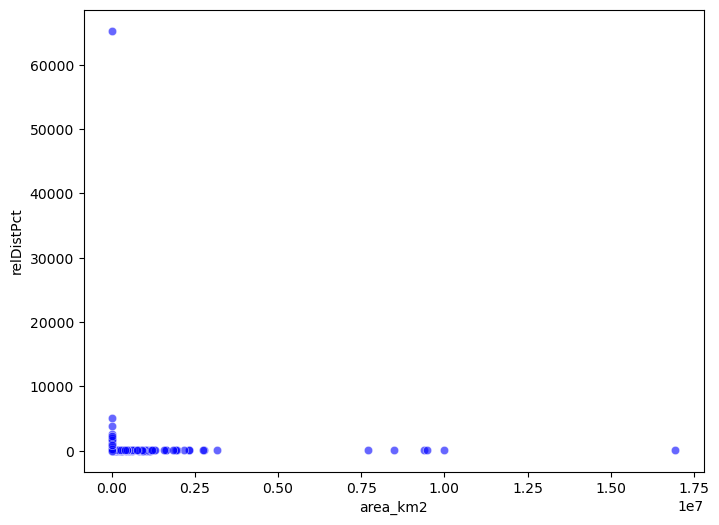

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_km2', y='relDistPct', data=data_clean, color='blue', alpha=0.6)

# Plot the regression line using the results from the regression
# Predict values using the regression model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(data_clean['area_km2'], y_pred, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Area (km²)')
plt.ylabel('Relative Distance to Capital Center (Percentage)')
plt.title('Relationship between Country Size and Capital Centricity')

# Show the plot
plt.show()


In [124]:
# Assuming countries_w_caps has the centroids and capital locations
# Create a DataFrame to hold the results
closer_centroids = []

# Loop through each country
for idx, country in countries_w_caps.iterrows():
    country_centroid = country['centroid']
    country_cap_loc = country['capLoc']
    
    # Calculate the distance to the centroid of each country
    distances = countries_w_caps['capLoc'].distance(country_centroid)

    # Find the closest capital city (not the country's own capital)
    closest_index = distances[distances.index != idx].idxmin()
    closest_distance = distances[closest_index]

    # Compare distances
    if closest_distance < country_cap_loc.distance(country_centroid):
        closer_centroids.append({
            'country': country['COUNTRY'],
            'closest_country': countries_w_caps.loc[closest_index]['COUNTRY'],
            'distance_to_closest': closest_distance,
            'own_distance': country_cap_loc.distance(country_centroid)
        })

# Create a DataFrame with the results
closer_centroids_df = gpd.GeoDataFrame(closer_centroids)

# Display the results
print(closer_centroids_df)


AttributeError: 'NoneType' object has no attribute 'distance'

## Summary

This lecture provided an introduction to working with geospatial data using GeoPandas. We covered basic concepts such as reading/writing geospatial data, performing spatial operations (e.g., buffering, intersections), and visualizing geospatial data using maps. GeoPandas, built on Pandas and Shapely, enables efficient and intuitive geospatial analysis in Python.